In [2]:
import pandas as pd

# Load the dataset
file_path = 'Winedataset_subset.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
df.head()


Instances  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       4044            6.9              0.31         0.32             1.6   
1       5377            5.7              0.21         0.24             2.3   
2       2938            6.8              0.26         0.46             8.3   
3       2304            6.7              0.27         0.33             3.6   
4       5664            7.1              0.44         0.23             5.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.036                 34.0                 114.0  0.99068  3.19   
1      0.047                 60.0                 189.0  0.99500  3.65   
2      0.037                 49.0                 173.0  0.99601  3.17   
3      0.034                  9.0                  45.0  0.99144  3.08   
4      0.035                 24.0                 100.0  0.99062  3.15   

   sulphates  alcohol  quality        Type  
0       0.45     11.4        7  White Wine  
1       0.72     10.1        6  White Wine  
2       0.47      9.3        5  White Wine  
3       0.40     10.5        6  White Wine  
4       0.57     13.2        7  White Wine

In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame to store the encoded data
df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Type' column
df_encoded['Type'] = label_encoder.fit_transform(df['Type'])

# Show the first few rows of the new DataFrame with encoded 'Type'
df_encoded.head()


Instances  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       4044            6.9              0.31         0.32             1.6   
1       5377            5.7              0.21         0.24             2.3   
2       2938            6.8              0.26         0.46             8.3   
3       2304            6.7              0.27         0.33             3.6   
4       5664            7.1              0.44         0.23             5.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.036                 34.0                 114.0  0.99068  3.19   
1      0.047                 60.0                 189.0  0.99500  3.65   
2      0.037                 49.0                 173.0  0.99601  3.17   
3      0.034                  9.0                  45.0  0.99144  3.08   
4      0.035                 24.0                 100.0  0.99062  3.15   

   sulphates  alcohol  quality  Type  
0       0.45     11.4        7     1  
1       0.72     10.1        6     1  
2       0.47      9.3        5     1  
3       0.40     10.5        6     1  
4       0.57     13.2        7     1

In [ ]:
# RFE 

In [4]:
from sklearn.model_selection import train_test_split

# Features (excluding 'Type' column)
X = df_encoded.drop(['Type'], axis=1)

# Target variable ('Type' column)
y = df_encoded['Type']

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4000, 13), (1000, 13), (4000,), (1000,))

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with the Random Forest Classifier and the number of features to select
selector_rf = RFE(rf, n_features_to_select=1, step=1)

# Fit RFE
selector_rf = selector_rf.fit(X_train, y_train)

# Get the ranking of features, 1 is the best
feature_ranking_rf = selector_rf.ranking_

# Create a DataFrame for feature ranking based on Random Forest
features_rf_df = pd.DataFrame({'Feature': X_train.columns, 'Rank': feature_ranking_rf})
features_rf_df = features_rf_df.sort_values('Rank')

# Display the feature ranking
features_rf_df


Feature  Rank
7   total sulfur dioxide     1
5              chlorides     2
2       volatile acidity     3
10             sulphates     4
8                density     5
4         residual sugar     6
6    free sulfur dioxide     7
1          fixed acidity     8
9                     pH     9
3            citric acid    10
11               alcohol    11
0              Instances    12
12               quality    13

In [7]:
# Initialize a dictionary to store accuracy results for each feature set
accuracy_results = {}

# Loop through the ranked features and incrementally add them to the feature set
for num_features in range(1, len(features_rf_df) + 1):
    selected_features = features_rf_df['Feature'][:num_features].tolist()
    
    # Subset the training and testing data based on the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Train the Random Forest Classifier on the selected features
    rf.fit(X_train_selected, y_train)
    
    # Evaluate the model on the test set and store the accuracy
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[num_features] = accuracy

# Convert the accuracy results to a DataFrame for better visualization
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Number of Features', 'Accuracy']).sort_values('Accuracy', ascending=False)

# Display the DataFrame
accuracy_df


Number of Features  Accuracy
6                    7     0.999
12                  13     0.999
5                    6     0.998
7                    8     0.998
8                    9     0.998
10                  11     0.998
9                   10     0.997
11                  12     0.997
4                    5     0.995
3                    4     0.993
2                    3     0.992
1                    2     0.990
0                    1     0.931

In [ ]:
    # Total sulfur dioxide
    # Chlorides
    # Volatile acidity
    # Sulphates
    # Density
    # Residual sugar
    # Free sulfur dioxide

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time

# Replace the following lines with your actual data and feature selection
# X_train, X_test, y_train, y_test = your_train_test_split_data
# selected_features = your_selected_features

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize an empty DataFrame to store performance metrics
performance_metrics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Time (s)'])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Loop through each classifier and collect metrics
# Initialize an empty list to store performance metrics
performance_metrics_list = []

# Loop through each classifier and collect metrics
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    end_time = time.time()

    elapsed_time = end_time - start_time
    cv_accuracy = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='accuracy'))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

    # Use a dictionary to store metrics for this classifier
    performance_dict = {
        'Classifier': name,
        'Accuracy': cv_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Time (s)': elapsed_time
    }
    
    # Append the dictionary to the list
    performance_metrics_list.append(performance_dict)

# Convert the list of dictionaries to a DataFrame
performance_metrics = pd.DataFrame(performance_metrics_list)

print(performance_metrics)



            Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.99150   0.998650  0.997305  0.997977  0.999948   
1                  SVM   0.99500   0.997308  0.998652  0.997980  0.999948   
2        Random Forest   0.99550   0.998652  0.998652  0.998652  0.999995   
3          Naive Bayes   0.97775   0.994521  0.978437  0.986413  0.991658   

   Time (s)  
0  0.011862  
1  0.205245  
2  0.330851  
3  0.011108  


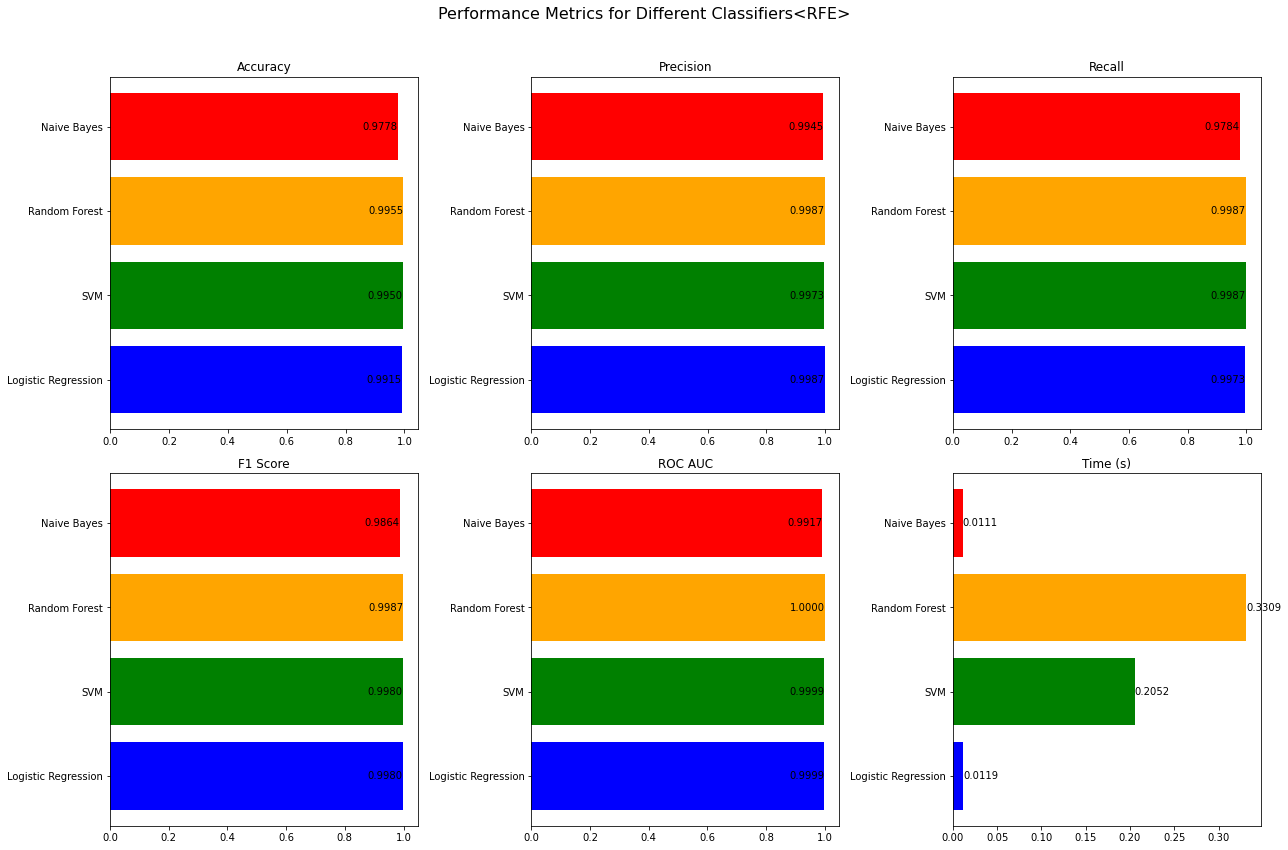

In [24]:
# Custom colors for the bar plot
colors = ['blue', 'green', 'orange', 'red']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Performance Metrics for Different Classifiers<RFE>', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each metric and plot
for i, metric in enumerate(metrics):
    axes[i].barh(labels, performance_metrics[metric], color=colors)
    axes[i].set_title(metric)
    for j, v in enumerate(performance_metrics[metric]):
        axes[i].text(v, j, f'{v:.4f}', va='center', ha='left' if i==5 else 'right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [ ]:
# With all features 

In [14]:
# Initialize an empty list to store performance metrics
all_features_performance_list = []

# Standardize all features for training and testing sets
X_train_all_scaled = scaler.fit_transform(X_train)
X_test_all_scaled = scaler.transform(X_test)

# Loop through each classifier and collect metrics
for name, clf in classifiers.items():
    # Measure computational time for training and prediction
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train_all_scaled, y_train)
    
    # Prediction
    y_pred = clf.predict(X_test_all_scaled)
    
    # Computational time
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Evaluate the model using k-fold cross-validation
    cv_accuracy = np.mean(cross_val_score(clf, X_train_all_scaled, y_train, cv=10, scoring='accuracy'))
    
    # Other performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_all_scaled)[:, 1])
    
    # Use a dictionary to store metrics for this classifier
    performance_dict = {
        'Classifier': name,
        'Accuracy': cv_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Time (s)': elapsed_time
    }
    
    # Append the dictionary to the list
    all_features_performance_list.append(performance_dict)

# Convert the list of dictionaries to a DataFrame
all_features_performance_metrics = pd.DataFrame(all_features_performance_list)

# Display the performance metrics DataFrame
all_features_performance_metrics


Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.99275   0.997308  0.998652  0.997980  0.999943   
1                  SVM   0.99575   1.000000  0.998652  0.999326  0.999963   
2        Random Forest   0.99575   0.997312  1.000000  0.998654  0.999948   
3          Naive Bayes   0.98025   0.994513  0.977089  0.985724  0.992170   

   Time (s)  
0  0.013542  
1  0.350745  
2  0.402747  
3  0.010872

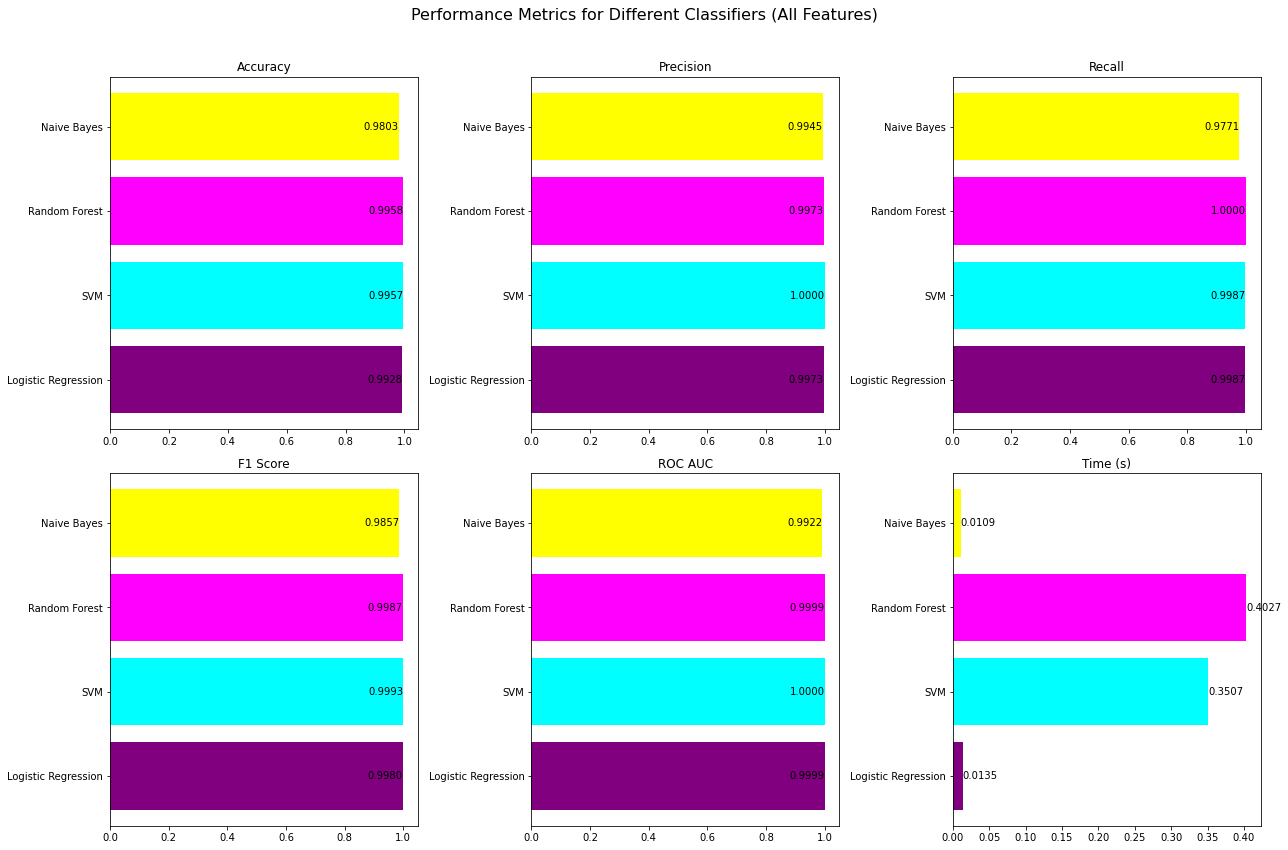

In [15]:
# Create colorful bar plots for the performance metrics of classifiers using all features
colors_all_features = ['purple', 'cyan', 'magenta', 'yellow']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Performance Metrics for Different Classifiers (All Features)', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each metric and plot
for i, metric in enumerate(metrics):
    axes[i].barh(all_features_performance_metrics['Classifier'], all_features_performance_metrics[metric], color=colors_all_features)
    axes[i].set_title(metric)
    for j, v in enumerate(all_features_performance_metrics[metric]):
        axes[i].text(v, j, f'{v:.4f}', va='center', ha='left' if i==5 else 'right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [ ]:
# Forward selection 

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Assuming X_train and y_train are your data
# X_train, y_train = make_classification(n_features=20, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Sequential Feature Selector
sfs = SFS(
    rf,
    k_features='best',  # Select best features
    forward=True,       # Forward selection
    floating=False,
    verbose=2,
    scoring='accuracy',
    cv=10
)

# Fit the data to Sequential Feature Selector
sfs = sfs.fit(X_train, y_train)

# Selected features
selected_features = list(sfs.k_feature_names_)
print("Selected Features:", selected_features)

# Score of the selected features
print("Score:", sfs.k_score_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   28.3s finished

[2023-09-06 16:10:26] Features: 1/13 -- score: 0.92875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   28.9s finished

[2023-09-06 16:10:55] Features: 2/13 -- score: 0.98375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   24.5s finished

[2023-09-06 16:11:19] Features: 3/13 -- score: 0.9907499999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapse

Selected Features: ['Instances', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
Score: 0.9970000000000001


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished

[2023-09-06 16:14:13] Features: 13/13 -- score: 0.9957500000000001

In [17]:
# Given selected features from forward selection
selected_features_sfs = ['Instances', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

# Initialize an empty list to store performance metrics for models trained on selected features
sfs_performance_list = []

# Standardize the selected features for training and testing sets
X_train_sfs_scaled = scaler.fit_transform(X_train[selected_features_sfs])
X_test_sfs_scaled = scaler.transform(X_test[selected_features_sfs])

# Loop through each classifier and collect metrics
for name, clf in classifiers.items():
    # Measure computational time for training and prediction
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train_sfs_scaled, y_train)
    
    # Prediction
    y_pred = clf.predict(X_test_sfs_scaled)
    
    # Computational time
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Evaluate the model using k-fold cross-validation
    cv_accuracy = np.mean(cross_val_score(clf, X_train_sfs_scaled, y_train, cv=10, scoring='accuracy'))
    
    # Other performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_sfs_scaled)[:, 1])
    
    # Use a dictionary to store metrics for this classifier
    performance_dict = {
        'Classifier': name,
        'Accuracy': cv_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Time (s)': elapsed_time
    }
    
    # Append the dictionary to the list
    sfs_performance_list.append(performance_dict)

# Convert the list of dictionaries to a DataFrame
sfs_performance_metrics = pd.DataFrame(sfs_performance_list)

# Display the performance metrics DataFrame
sfs_performance_metrics


Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.99100   0.998643  0.991914  0.995267  0.999916   
1                  SVM   0.99475   0.998652  0.998652  0.998652  0.999963   
2        Random Forest   0.99700   0.998654  1.000000  0.999327  0.999995   
3          Naive Bayes   0.98000   0.994521  0.978437  0.986413  0.990490   

   Time (s)  
0  0.047603  
1  0.309722  
2  0.476486  
3  0.006256

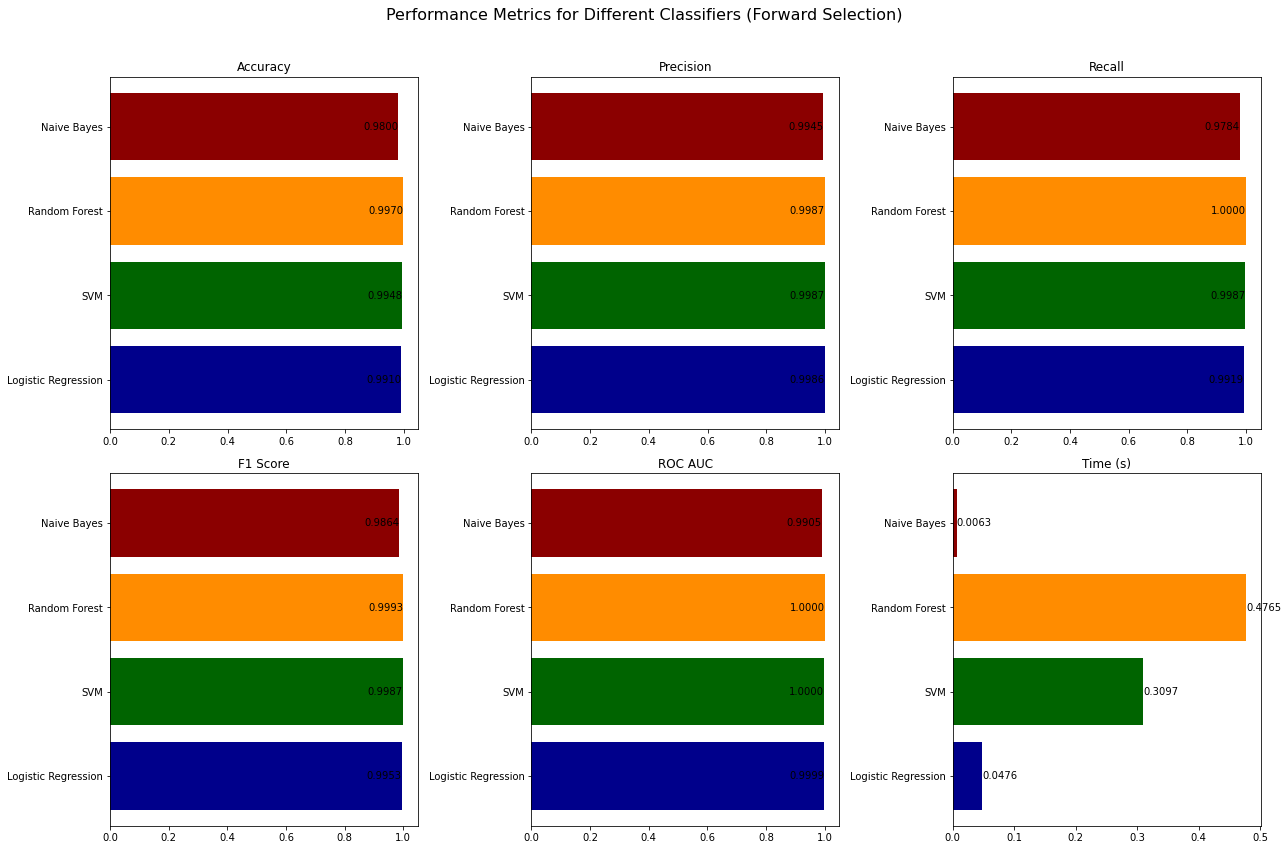

In [25]:
# Create colorful bar plots for the performance metrics of classifiers trained on selected features
colors_sfs = ['darkblue', 'darkgreen', 'darkorange', 'darkred']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Performance Metrics for Different Classifiers (Forward Selection)', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each metric and plot
for i, metric in enumerate(metrics):
    axes[i].barh(sfs_performance_metrics['Classifier'], sfs_performance_metrics[metric], color=colors_sfs)
    axes[i].set_title(metric)
    for j, v in enumerate(sfs_performance_metrics[metric]):
        axes[i].text(v, j, f'{v:.4f}', va='center', ha='left' if i==5 else 'right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [ ]:
# Backward selection 

In [20]:
# Initialize an empty list to store performance metrics for models trained on the selected feature from backward selection
backward_performance_list = []

# Standardize the selected features for training and testing sets
X_train_backward_scaled = scaler.fit_transform(X_train[selected_features_backward])
X_test_backward_scaled = scaler.transform(X_test[selected_features_backward])

# Loop through each classifier and collect metrics
for name, clf in classifiers.items():
    # Measure computational time for training and prediction
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train_backward_scaled, y_train)
    
    # Prediction
    y_pred = clf.predict(X_test_backward_scaled)
    
    # Computational time
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Evaluate the model using k-fold cross-validation
    cv_accuracy = np.mean(cross_val_score(clf, X_train_backward_scaled, y_train, cv=10, scoring='accuracy'))
    
    # Other performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_backward_scaled)[:, 1])
    
    # Use a dictionary to store metrics for this classifier
    performance_dict = {
        'Classifier': name,
        'Accuracy': cv_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Time (s)': elapsed_time
    }
    
    # Append the dictionary to the list
    backward_performance_list.append(performance_dict)

# Convert the list of dictionaries to a DataFrame
backward_performance_metrics = pd.DataFrame(backward_performance_list)

# Display the performance metrics DataFrame
backward_performance_metrics


Classifier  Accuracy  Precision  Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.75525      0.742     1.0  0.851894  0.576352   
1                  SVM   0.75525      0.742     1.0  0.851894  0.451198   
2        Random Forest   0.75525      0.742     1.0  0.851894  0.592441   
3          Naive Bayes   0.75525      0.742     1.0  0.851894  0.585885   

   Time (s)  
0  0.003376  
1  1.495013  
2  0.173303  
3  0.000000

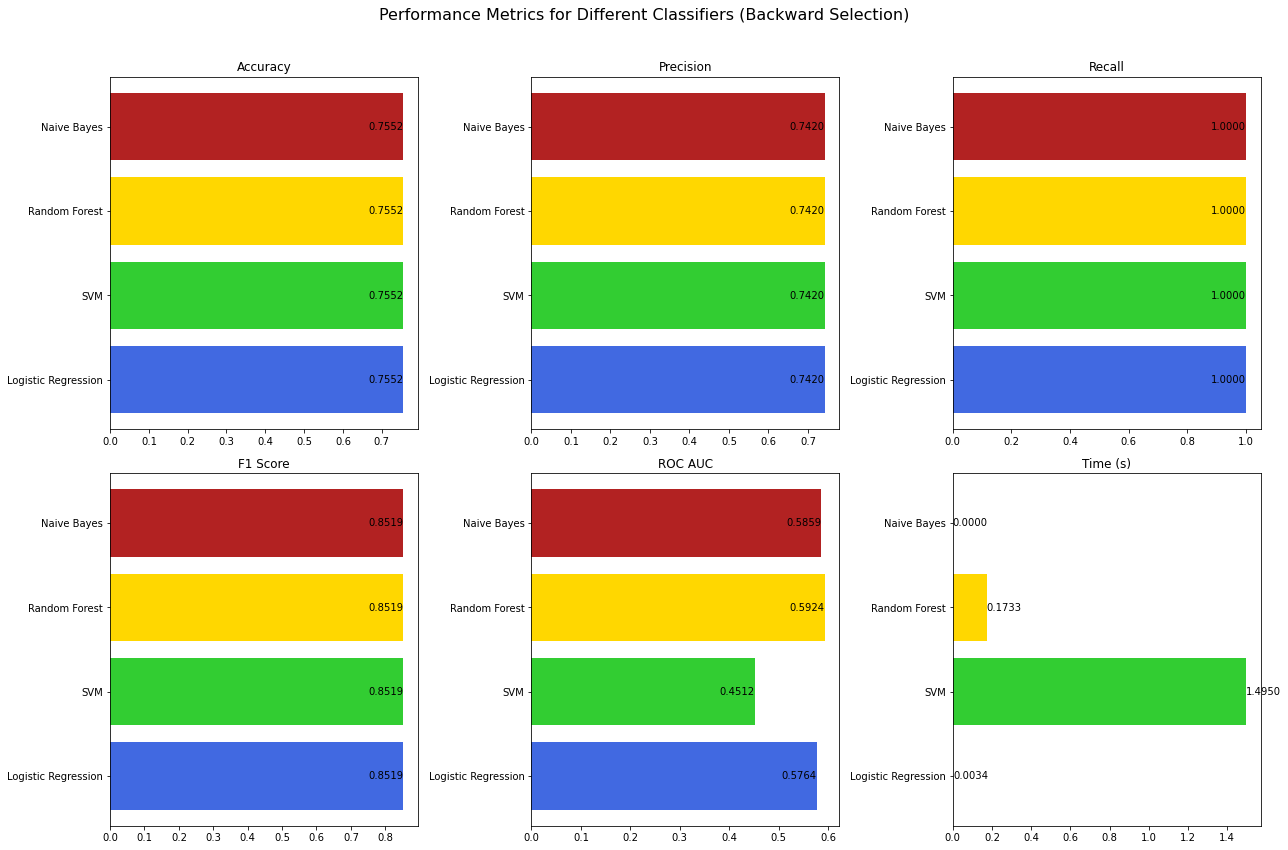

In [21]:
# Create colorful bar plots for the performance metrics of classifiers trained on selected features from backward selection
colors_backward = ['royalblue', 'limegreen', 'gold', 'firebrick']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Performance Metrics for Different Classifiers (Backward Selection)', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each metric and plot
for i, metric in enumerate(metrics):
    axes[i].barh(backward_performance_metrics['Classifier'], backward_performance_metrics[metric], color=colors_backward)
    axes[i].set_title(metric)
    for j, v in enumerate(backward_performance_metrics[metric]):
        axes[i].text(v, j, f'{v:.4f}', va='center', ha='left' if i==5 else 'right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [ ]:
# Collective results 

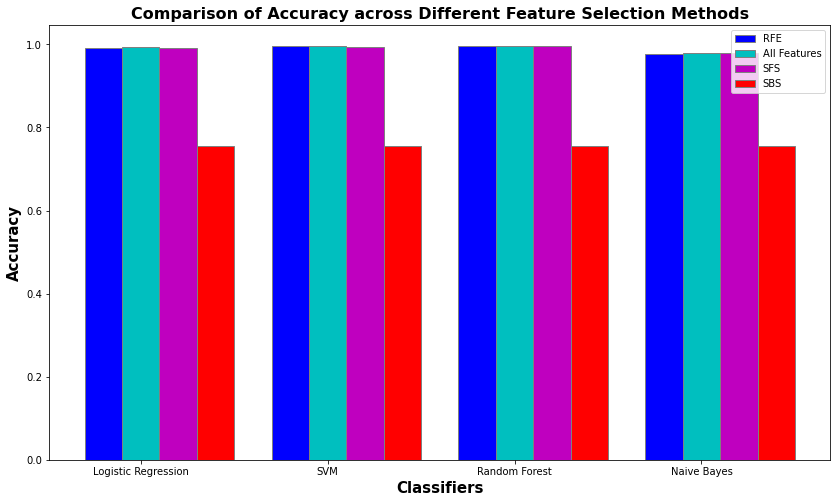

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['RFE', 'All Features', 'SFS', 'SBS']
classifiers = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']

# Accuracy scores for different methods and classifiers
accuracy_scores = {
    'RFE': [0.9915, 0.995, 0.9955, 0.97775],
    'All Features': [0.99275, 0.99575, 0.99575, 0.98025],
    'SFS': [0.991, 0.99475, 0.997, 0.980],
    'SBS': [0.75525, 0.75525, 0.75525, 0.75525]
}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

barWidth = 0.2
r1 = np.arange(len(accuracy_scores['RFE']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Add bars
ax.bar(r1, accuracy_scores['RFE'], color='b', width=barWidth, edgecolor='grey', label='RFE')
ax.bar(r2, accuracy_scores['All Features'], color='c', width=barWidth, edgecolor='grey', label='All Features')
ax.bar(r3, accuracy_scores['SFS'], color='m', width=barWidth, edgecolor='grey', label='SFS')
ax.bar(r4, accuracy_scores['SBS'], color='r', width=barWidth, edgecolor='grey', label='SBS')

# Add labels
ax.set_xlabel('Classifiers', fontweight='bold', fontsize=15)
ax.set_ylabel('Accuracy', fontweight='bold', fontsize=15)
ax.set_title('Comparison of Accuracy across Different Feature Selection Methods', fontweight='bold', fontsize=16)
ax.set_xticks([r + barWidth for r in range(len(accuracy_scores['RFE']))])
ax.set_xticklabels(classifiers)

# Add legend
ax.legend()

plt.show()


In [ ]:
    # Random Forest performs the best in terms of accuracy when using the SFS feature selection method.
    # All classifiers have noticeably lower accuracy when using the SBS method.
    # Using All Features and SFS generally yield high accuracy for SVM and Random Forest.
    # Logistic Regression performs consistently well across RFE, All Features, and SFS but drops significantly in accuracy with SBS.

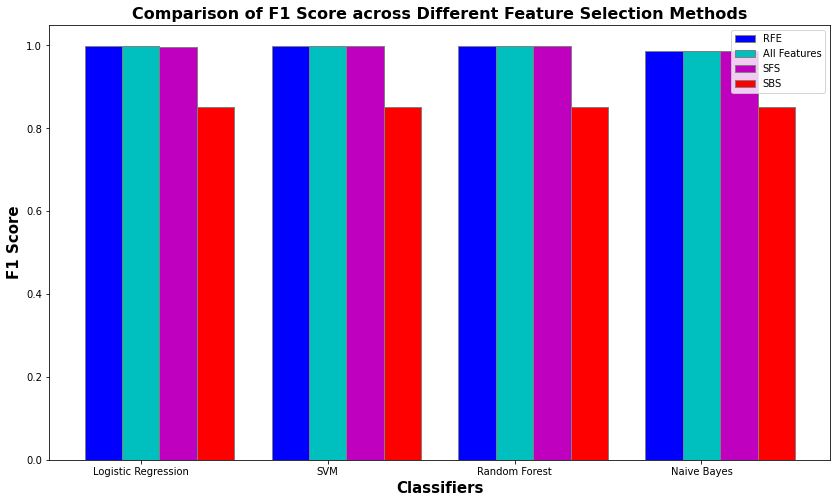

In [23]:
# Additional Metrics for different methods and classifiers
precision_scores = {
    'RFE': [0.99865, 0.997308, 0.998652, 0.994521],
    'All Features': [0.997308, 1.000000, 0.997312, 0.994513],
    'SFS': [0.998643, 0.998652, 0.998654, 0.994521],
    'SBS': [0.742, 0.742, 0.742, 0.742]
}

recall_scores = {
    'RFE': [0.997305, 0.998652, 0.998652, 0.978437],
    'All Features': [0.998652, 0.998652, 1.000000, 0.977089],
    'SFS': [0.991914, 0.998652, 1.000000, 0.978437],
    'SBS': [1.0, 1.0, 1.0, 1.0]
}

f1_scores = {
    'RFE': [0.997977, 0.997980, 0.998652, 0.986413],
    'All Features': [0.997980, 0.999326, 0.998654, 0.985724],
    'SFS': [0.995267, 0.998652, 0.999327, 0.986413],
    'SBS': [0.851894, 0.851894, 0.851894, 0.851894]
}

roc_auc_scores = {
    'RFE': [0.999948, 0.999948, 0.999995, 0.991658],
    'All Features': [0.999943, 0.999963, 0.999948, 0.992170],
    'SFS': [0.999916, 0.999963, 0.999995, 0.990490],
    'SBS': [0.576352, 0.451198, 0.592441, 0.585885]
}

# Function to plot comparison graphs for different metrics
def plot_metrics_comparison(metric_scores, metric_name):
    fig, ax = plt.subplots(figsize=(14, 8))

    barWidth = 0.2
    r1 = np.arange(len(metric_scores['RFE']))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    ax.bar(r1, metric_scores['RFE'], color='b', width=barWidth, edgecolor='grey', label='RFE')
    ax.bar(r2, metric_scores['All Features'], color='c', width=barWidth, edgecolor='grey', label='All Features')
    ax.bar(r3, metric_scores['SFS'], color='m', width=barWidth, edgecolor='grey', label='SFS')
    ax.bar(r4, metric_scores['SBS'], color='r', width=barWidth, edgecolor='grey', label='SBS')

    ax.set_xlabel('Classifiers', fontweight='bold', fontsize=15)
    ax.set_ylabel(metric_name, fontweight='bold', fontsize=15)
    ax.set_title(f'Comparison of {metric_name} across Different Feature Selection Methods', fontweight='bold', fontsize=16)
    ax.set_xticks([r + barWidth for r in range(len(metric_scores['RFE']))])
    ax.set_xticklabels(classifiers)
    ax.legend()
    
    plt.show()

# Plot comparison graphs
plot_metrics_comparison(precision_scores, 'Precision')
plot_metrics_comparison(recall_scores, 'Recall')
plot_metrics_comparison(f1_scores, 'F1 Score')
plot_metrics_comparison(roc_auc_scores, 'ROC AUC')


In [ ]:
# Precision:

#     High precision is observed when using All Features and SFS for SVM and Random Forest.
#     The precision takes a significant dip for all classifiers when using the SBS method.

# Recall:

#     Random Forest has perfect recall when using All Features and SFS.
#     SBS achieves perfect recall but likely at the cost of many false positives, given its low precision.

# F1 Score:

#     Random Forest with SFS and SVM with All Features have the highest F1 Scores.
#     All classifiers perform poorly in terms of F1 Score when using SBS.

# ROC AUC:

#     Extremely high ROC AUC scores are observed for Random Forest and SVM across RFE, All Features, and SFS.
#     SBS has the lowest ROC AUC scores across all classifiers.

# Overall, SFS and using All Features often yield the best results, with Random Forest and SVM being the most effective classifiers. SBS performs poorly across all metrics for all classifiers.